# 로지스틱 회귀 (Logistic Regression)

bream 도미
roach 잉어
whitefish 송어
parkki ...

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
fish_df = pd.read_csv('./fish_data.csv')
fish_df.head(), pd.unique(fish_df['Species'])

(  Species  Weight  Length  Diagonal   Height   Width
 0   Bream   242.0    25.4      30.0  11.5200  4.0200
 1   Bream   290.0    26.3      31.2  12.4800  4.3056
 2   Bream   340.0    26.5      31.1  12.3778  4.6961
 3   Bream   363.0    29.0      33.5  12.7300  4.4555
 4   Bream   430.0    29.0      34.0  12.4440  5.1340,
 array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object))

In [ ]:
# 데이터셋 분리
# 보통 데이터가 많아질수록 np(array)로 변환함 (기능 적지만 가벼워서)
# pd는 아무래도 표로 만들다보니 무가와요...

X = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y = fish_df['Species'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

len(X_train)

119

In [ ]:
# 스케일링 (훈련 셋에서 사용한 기준으로 테스트셋을 스케일링 해야 함)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 훈련 셋 기준으로 학습
ss.fit(X_train)

# 그 규칙으로 모두 변환
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# 중요한 점은, 테스트 데이터도 훈련 데이터 기준으로 변환한다는 거.
# 테스트 데이터의 평균·표준편차를 새로 구하는 게 아니라,
# 훈련 데이터에서 구한 평균·표준편차를 그대로 적용

### KN으로 보자

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 주변 3개의 생선을 보고 확률을 계산하자
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)

kn.score(X_train, y_train), kn.score(X_test, y_test)

(0.8907563025210085, 0.85)

In [17]:
# KN분류기가 분류해내는 항목들(클래스)
print(kn.classes_)

# 테스트셋에서 앞 5개 데이터를 예측해라
print(kn.predict(X_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
# 테스트 데이터 5개가 특정 생선일 확률을 알려줘
kn.predict_proba(X_test[:5])

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

### 로지스틱 회귀
로지스틱 회귀는 분류(1기다, 0아니다)

확률을 구할 때 시그모이드 함수를 사용해서 0~1로 변환

Z = a*무게 + b*길이 + c*높이 + d*대각선 + e*두께 + f

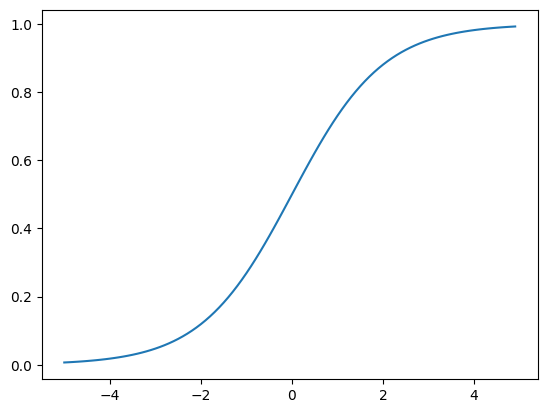

In [32]:
import matplotlib.pyplot as plt

# 시그모이드 함수(모든 x를 0 ~ 1 사이 값으로 변환)
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진분류 (빙어, 도미)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)


index = (y_train == 'Bream') | (y_train == 'Smelt')

X_bream_smelt_train = X_train_s[index]
y_bream_smelt_train = y_train[index]

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 로지스틱 회귀 학습 -> 방정식 만들기
lr.fit(X_bream_smelt_train, y_bream_smelt_train)
print(f'=== 방정식 기울기, 절편 결과 {lr.coef_} / {lr.intercept_}===')
# -0.4무게 + -0.576길이 + ...

# 분류 항목 확인
print(lr.classes_)

# 도미/빙어 예측 결과
print(lr.predict(X_bream_smelt_train))

# 점수
print(lr.score(X_bream_smelt_train, y_bream_smelt_train))



# 1. z점수 -> 이걸 시그모이드 함수에 넣으면 아래 값이 나옴!
decisions = lr.decision_function(X_bream_smelt_train[:5])

# 2-1. 직접 시그모이드 통과시키기
from scipy.special import expit
print(expit(decisions))

# 2-2. 바로 계산된 결과 (확률)
print(lr.predict_proba(X_bream_smelt_train[:5]))

=== 방정식 기울기, 절편 결과 [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] / [-2.16172774]===
['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']
1.0
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


### 로지스틱 회귀로 다중분류 (생선 7종)

In [ ]:
# 시그모이드 vs 소프트맥스 함수

# 시그모이드(sigmoid): 0~1로 변환 → 이진 분류(binary classification)
# 소프트맥스(softmax): 여러 클래스 확률 분포로 변환 → 다중 분류(multi-class classification)
                    # 신경망이나 로지스틱 회귀는 최종적으로 "점수(logit)"를 뱉음
                    # 이 점수는 그냥 크고 작은 실수 → 소프트맥스를 쓰면 이 값들을 "확률 분포"로 바꿔줌

In [38]:
# 2진분류 vs 다중분류에 따라 내부 동작이 다름!

# C = 규제, max_iter = 반복횟수의 제한 
lr = LogisticRegression(C=20, max_iter=1000)

lr.fit(X_train_s, y_train)

# 훈련, 테스트 점수
print(lr.score(X_train_s, y_train))
print(lr.score(X_test_s, y_test))

0.9327731092436975
0.925


In [43]:
print(lr.predict(X_test_s[:5]))

# 분류의 근거 (확률)을 보자
print(lr.classes_)
print(np.round(lr.predict_proba(X_test_s[:5]), decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [44]:
decisions = lr.decision_function(X_test_s[:5])
np.round(decisions, decimals=2)

array([[ -6.51,   1.04,   5.17,  -2.76,   3.34,   0.35,  -0.63],
       [-10.88,   1.94,   4.78,  -2.42,   2.99,   7.84,  -4.25],
       [ -4.34,  -6.24,   3.17,   6.48,   2.36,   2.43,  -3.87],
       [ -0.69,   0.45,   2.64,  -1.21,   3.26,  -5.7 ,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.13,   3.5 ,  -0.09,  -0.7 ]])

### with GPT....    

In [ ]:
from sklearn.linear_model import LogisticRegression

X = [[1, 2], [2, 1], [3, 5], [5, 2]]
y = [0, 0, 1, 2]

                            # 다중분류를 할게~      최적화 알고리즘 (확률 계산을 위한 파라미터 찾기용)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

new_data = [[3, 3]]
print("클래스별 확률:", clf.predict_proba(new_data))
print("예측 클래스:", clf.predict(new_data))

클래스별 확률: [[0.42094336 0.32248407 0.25657257]]
예측 클래스: [0]


c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C:\Users\agnes\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\agnes\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\agnes\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\agnes\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\agnes\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

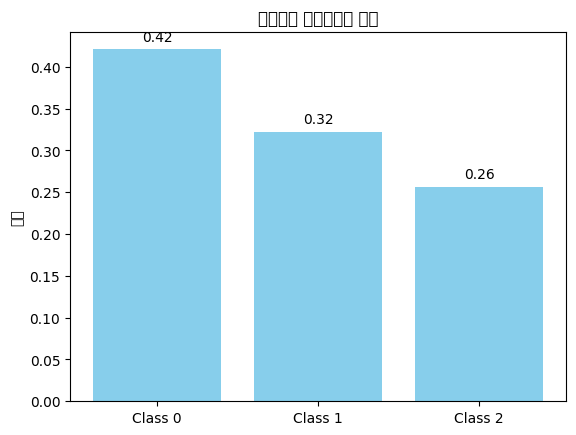

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 예측 확률 (predict_proba 결과)
probs = np.array([0.42094336, 0.32248407, 0.25657257])

# 클래스 이름 (0, 1, 2라고 가정)
classes = np.arange(len(probs))

# 막대그래프 그리기
plt.bar(classes, probs, color="skyblue")
plt.xticks(classes, [f"Class {c}" for c in classes])
plt.ylabel("확률")
plt.title("클래스별 소프트맥스 확률")

# 확률 값 표시
for i, v in enumerate(probs):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")

plt.show()

In [7]:
# 위 코드는 데이터가 넘 적어서 0으로 쏠린거 아냐..? 싶어서 다시 만듦
# 클래스 0 (왼쪽 아래 근처)
X0 = [[1,2],[2,1],[2,2],[1,1]]
y0 = [0]*len(X0)

# 클래스 1 (위쪽)
X1 = [[3,5],[3,4],[4,5],[2,5]]
y1 = [1]*len(X1)

# 클래스 2 (오른쪽 아래)
X2 = [[5,2],[4,2],[5,3],[6,2]]
y2 = [2]*len(X2)

# 전체 합치기
X = X0 + X1 + X2
y = y0 + y1 + y2

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

new_data = [[3, 3]]
print("클래스별 확률:", clf.predict_proba(new_data))
print("예측 클래스:", clf.predict(new_data))

클래스별 확률: [[0.30440777 0.40994894 0.2856433 ]]
예측 클래스: [1]


c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
